In [1]:
import pandas as pd

data = {
    "ticket_id": [1,2,3,4,5,6,7,8,9,10],
    "ticket_text": [
        "Hi, my order #78451 is delayed for 5 days. Please help!",
        "Payment failed while using debit card yesterday.",
        "App crashes when I try to login from my phone.",
        "Refund not received even after 10 days.",
        "Unable to reset my password. Link not working.",
        "My subscription was charged twice this month!",
        "Order delivered but item is damaged.",
        "Facing error code 504 while checkout.",
        "Please cancel my order immediately.",
        "Account suspended without any reason."
    ],
    "priority": ["High","High","Medium","High","Medium","High","Medium","Medium","High","High"]
}

df = pd.DataFrame(data)
df


,ticket_id,ticket_text,priority
0,1,"Hi, my order #78451 is delayed for 5 days. Ple...",High
1,2,Payment failed while using debit card yesterday.,High
2,3,App crashes when I try to login from my phone.,Medium
3,4,Refund not received even after 10 days.,High
4,5,Unable to reset my password. Link not working.,Medium
5,6,My subscription was charged twice this month!,High
6,7,Order delivered but item is damaged.,Medium
7,8,Facing error code 504 while checkout.,Medium
8,9,Please cancel my order immediately.,High
9,10,Account suspended without any reason.,High


In [2]:
!pip install spacy nltk pandas textblob
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import re
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob


In [4]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/greeshma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/greeshma/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/greeshma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df["clean_text"] = df["ticket_text"].apply(clean_text)
df[["ticket_text","clean_text"]]


,ticket_text,clean_text
0,"Hi, my order #78451 is delayed for 5 days. Ple...",hi my order is delayed for days please help
1,Payment failed while using debit card yesterday.,payment failed while using debit card yesterday
2,App crashes when I try to login from my phone.,app crashes when i try to login from my phone
3,Refund not received even after 10 days.,refund not received even after days
4,Unable to reset my password. Link not working.,unable to reset my password link not working
5,My subscription was charged twice this month!,my subscription was charged twice this month
6,Order delivered but item is damaged.,order delivered but item is damaged
7,Facing error code 504 while checkout.,facing error code while checkout
8,Please cancel my order immediately.,please cancel my order immediately
9,Account suspended without any reason.,account suspended without any reason


In [6]:
stop_words = set(stopwords.words("english"))

def tokenize(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

df["tokens"] = df["clean_text"].apply(tokenize)
df[["clean_text","tokens"]]


,clean_text,tokens
0,hi my order is delayed for days please help,"[hi, order, delayed, days, please, help]"
1,payment failed while using debit card yesterday,"[payment, failed, using, debit, card, yesterday]"
2,app crashes when i try to login from my phone,"[app, crashes, try, login, phone]"
3,refund not received even after days,"[refund, received, even, days]"
4,unable to reset my password link not working,"[unable, reset, password, link, working]"
5,my subscription was charged twice this month,"[subscription, charged, twice, month]"
6,order delivered but item is damaged,"[order, delivered, item, damaged]"
7,facing error code while checkout,"[facing, error, code, checkout]"
8,please cancel my order immediately,"[please, cancel, order, immediately]"
9,account suspended without any reason,"[account, suspended, without, reason]"


In [7]:
nlp = spacy.load("en_core_web_sm")

def lemmatize(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop]

df["lemmatized_tokens"] = df["clean_text"].apply(lemmatize)
df[["clean_text","lemmatized_tokens"]]


,clean_text,lemmatized_tokens
0,hi my order is delayed for days please help,"[hi, order, delay, day, help]"
1,payment failed while using debit card yesterday,"[payment, fail, debit, card, yesterday]"
2,app crashes when i try to login from my phone,"[app, crash, try, login, phone]"
3,refund not received even after days,"[refund, receive, day]"
4,unable to reset my password link not working,"[unable, reset, password, link, work]"
5,my subscription was charged twice this month,"[subscription, charge, twice, month]"
6,order delivered but item is damaged,"[order, deliver, item, damage]"
7,facing error code while checkout,"[face, error, code, checkout]"
8,please cancel my order immediately,"[cancel, order, immediately]"
9,account suspended without any reason,"[account, suspend, reason]"


In [8]:
def spell_correct(text):
    return str(TextBlob(text).correct())

df["corrected_text"] = df["clean_text"].apply(spell_correct)
df[["clean_text","corrected_text"]]


,clean_text,corrected_text
0,hi my order is delayed for days please help,hi my order is delayed for days please help
1,payment failed while using debit card yesterday,payment failed while using debit card yesterday
2,app crashes when i try to login from my phone,pp clashes when i try to login from my phone
3,refund not received even after days,refund not received even after days
4,unable to reset my password link not working,unable to rest my password link not working
5,my subscription was charged twice this month,my subscription was charged twice this month
6,order delivered but item is damaged,order delivered but item is damaged
7,facing error code while checkout,facing error code while checkout
8,please cancel my order immediately,please cancel my order immediately
9,account suspended without any reason,account suspended without any reason


In [9]:
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df["entities"] = df["ticket_text"].apply(extract_entities)
df[["ticket_text","entities"]]


,ticket_text,entities
0,"Hi, my order #78451 is delayed for 5 days. Ple...","[(5 days, DATE)]"
1,Payment failed while using debit card yesterday.,"[(yesterday, DATE)]"
2,App crashes when I try to login from my phone.,[]
3,Refund not received even after 10 days.,"[(10 days, DATE)]"
4,Unable to reset my password. Link not working.,[]
5,My subscription was charged twice this month!,"[(this month, DATE)]"
6,Order delivered but item is damaged.,[]
7,Facing error code 504 while checkout.,"[(504, CARDINAL)]"
8,Please cancel my order immediately.,[]
9,Account suspended without any reason.,[]


In [10]:
def assign_category(text):
    if "payment" in text or "charged" in text or "refund" in text:
        return "Billing Issue"
    elif "order" in text or "delivery" in text or "cancel" in text:
        return "Order Issue"
    elif "app" in text or "error" in text or "crash" in text:
        return "Technical Issue"
    elif "password" in text or "account" in text:
        return "Account Issue"
    else:
        return "General"

df["category"] = df["clean_text"].apply(assign_category)
df[["ticket_text","category"]]


,ticket_text,category
0,"Hi, my order #78451 is delayed for 5 days. Ple...",Order Issue
1,Payment failed while using debit card yesterday.,Billing Issue
2,App crashes when I try to login from my phone.,Technical Issue
3,Refund not received even after 10 days.,Billing Issue
4,Unable to reset my password. Link not working.,Account Issue
5,My subscription was charged twice this month!,Billing Issue
6,Order delivered but item is damaged.,Order Issue
7,Facing error code 504 while checkout.,Technical Issue
8,Please cancel my order immediately.,Order Issue
9,Account suspended without any reason.,Account Issue


In [11]:
df


,ticket_id,ticket_text,priority,clean_text,tokens,lemmatized_tokens,corrected_text,entities,category
0,1,"Hi, my order #78451 is delayed for 5 days. Ple...",High,hi my order is delayed for days please help,"[hi, order, delayed, days, please, help]","[hi, order, delay, day, help]",hi my order is delayed for days please help,"[(5 days, DATE)]",Order Issue
1,2,Payment failed while using debit card yesterday.,High,payment failed while using debit card yesterday,"[payment, failed, using, debit, card, yesterday]","[payment, fail, debit, card, yesterday]",payment failed while using debit card yesterday,"[(yesterday, DATE)]",Billing Issue
2,3,App crashes when I try to login from my phone.,Medium,app crashes when i try to login from my phone,"[app, crashes, try, login, phone]","[app, crash, try, login, phone]",pp clashes when i try to login from my phone,[],Technical Issue
3,4,Refund not received even after 10 days.,High,refund not received even after days,"[refund, received, even, days]","[refund, receive, day]",refund not received even after days,"[(10 days, DATE)]",Billing Issue
4,5,Unable to reset my password. Link not working.,Medium,unable to reset my password link not working,"[unable, reset, password, link, working]","[unable, reset, password, link, work]",unable to rest my password link not working,[],Account Issue
5,6,My subscription was charged twice this month!,High,my subscription was charged twice this month,"[subscription, charged, twice, month]","[subscription, charge, twice, month]",my subscription was charged twice this month,"[(this month, DATE)]",Billing Issue
6,7,Order delivered but item is damaged.,Medium,order delivered but item is damaged,"[order, delivered, item, damaged]","[order, deliver, item, damage]",order delivered but item is damaged,[],Order Issue
7,8,Facing error code 504 while checkout.,Medium,facing error code while checkout,"[facing, error, code, checkout]","[face, error, code, checkout]",facing error code while checkout,"[(504, CARDINAL)]",Technical Issue
8,9,Please cancel my order immediately.,High,please cancel my order immediately,"[please, cancel, order, immediately]","[cancel, order, immediately]",please cancel my order immediately,[],Order Issue
9,10,Account suspended without any reason.,High,account suspended without any reason,"[account, suspended, without, reason]","[account, suspend, reason]",account suspended without any reason,[],Account Issue


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [17]:
X = df["clean_text"]      # input features
y = df["category"]        # target labels


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [21]:
tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2)   # unigrams + bigrams
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [22]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [23]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.5

Classification Report:

                 precision    recall  f1-score   support

  Account Issue       0.00      0.00      0.00         1
  Billing Issue       0.33      1.00      0.50         1
    Order Issue       1.00      1.00      1.00         1
Technical Issue       0.00      0.00      0.00         1

       accuracy                           0.50         4
      macro avg       0.33      0.50      0.38         4
   weighted avg       0.33      0.50      0.38         4



/home/greeshma/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/greeshma/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/greeshma/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [24]:
def predict_ticket_category(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    return model.predict(vector)[0]


In [25]:
sample_ticket = "My refund has not been processed yet"
print("Predicted Category:", predict_ticket_category(sample_ticket))


Predicted Category: Billing Issue


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [27]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)


<Figure size 700x500 with 0 Axes>

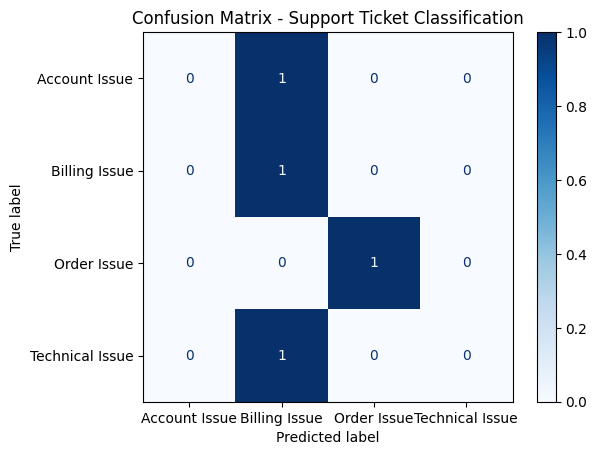

In [28]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model.classes_
)

plt.figure(figsize=(7, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Support Ticket Classification")
plt.show()


<Figure size 700x500 with 0 Axes>

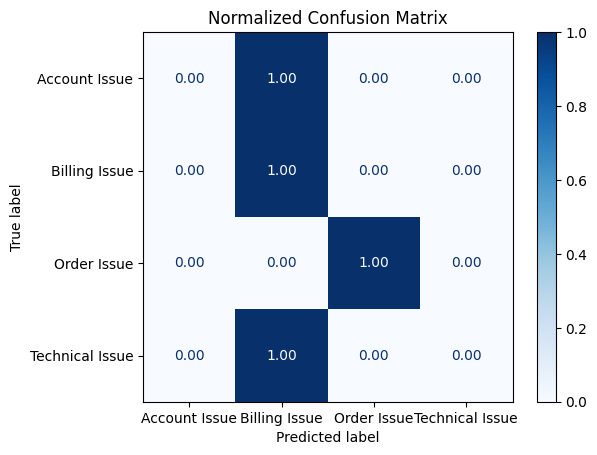

In [29]:
cm_norm = confusion_matrix(
    y_test, y_pred, labels=model.classes_, normalize="true"
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_norm,
    display_labels=model.classes_
)

plt.figure(figsize=(7, 5))
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Normalized Confusion Matrix")
plt.show()


In [30]:
# Choose one class as positive (example: Billing Issue)
positive_class = "Billing Issue"

y_test_binary = (y_test == positive_class).astype(int)


In [31]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test_tfidf)

# Get probabilities for the positive class
pos_class_index = list(model.classes_).index(positive_class)
y_scores = y_probs[:, pos_class_index]


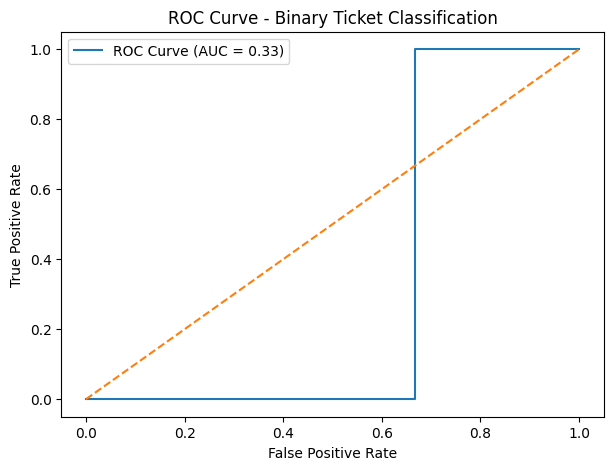

In [32]:
fpr, tpr, _ = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Binary Ticket Classification")
plt.legend()
plt.show()


In [33]:
feature_names = tfidf.get_feature_names_out()


In [34]:
import numpy as np

def top_tfidf_features(class_label, top_n=10):
    class_index = list(model.classes_).index(class_label)
    top_indices = np.argsort(model.feature_log_prob_[class_index])[-top_n:]
    return [feature_names[i] for i in reversed(top_indices)]


In [35]:
for category in model.classes_:
    print(f"\nTop TF-IDF features for '{category}':")
    print(top_tfidf_features(category, top_n=10))



Top TF-IDF features for 'Account Issue':
['working', 'to reset', 'password link', 'not working', 'reset', 'reset my', 'my password', 'to', 'password', 'link not']

Top TF-IDF features for 'Billing Issue':
['after', 'after days', 'even', 'even after', 'not received', 'received', 'received even', 'refund', 'refund not', 'subscription']

Top TF-IDF features for 'Order Issue':
['order', 'is', 'item is', 'damaged', 'delivered', 'order delivered', 'item', 'delivered but', 'is damaged', 'but item']

Top TF-IDF features for 'Technical Issue':
['error', 'checkout', 'facing error', 'facing', 'error code', 'code while', 'code', 'while checkout', 'while', 'charged twice']


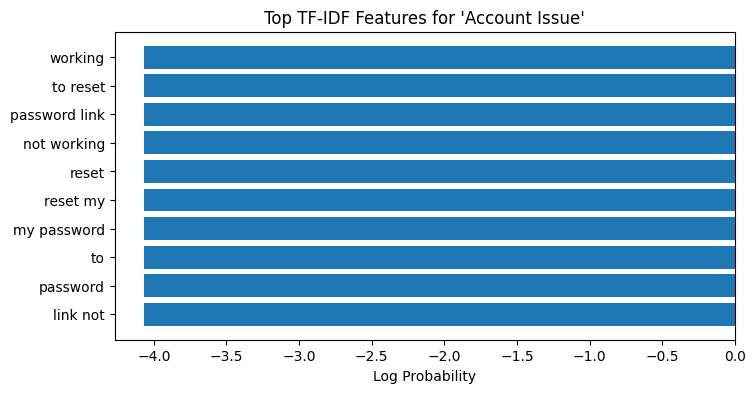

In [36]:
category = model.classes_[0]  # choose any class
words = top_tfidf_features(category, 10)

scores = model.feature_log_prob_[
    list(model.classes_).index(category)
][[list(feature_names).index(w) for w in words]]

plt.figure(figsize=(8, 4))
plt.barh(words, scores)
plt.xlabel("Log Probability")
plt.title(f"Top TF-IDF Features for '{category}'")
plt.gca().invert_yaxis()
plt.show()
